<a href="https://colab.research.google.com/github/SananSuleymanov/MNIST_Handwriting/blob/main/Sanan_Suleymanov_MNIST_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import decode_predictions
from keras.applications.mobilenet_v2 import preprocess_input
from keras.models import Model
import time
import tensorflow as tf
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import time
import cv2
import matplotlib.pyplot as plt
#from google.colab import files


# Export saved model
export_dir = 'mymodel'


# Load and prepare MNIST dataset
mnist = tf.keras.datasets.mnist

# Normalize dataset
(x_train1, y_train) , (x_test1, y_test) = mnist.load_data()

x_train = x_train1 / 255.0
x_test = x_test1 / 255.0

# Build sequential model by stacking layers, choose optimizer and loss function
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(70, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))
model.summary()

predictions = model(x_train[:1]).numpy()
predictions_prob = tf.nn.softmax(predictions).numpy()
print ('Probabilities for each class: ' + str(predictions_prob))

# Take a vector of logits and True index and return scalar loss for each example
# This loss is equal to the negative log probability of the true class: It is zero if the model is sure of the correct class.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_initial = loss_fn(y_train[:1], predictions).numpy()
print('Untrained model inital loss: ' + str(loss_initial))

# Train model
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

# Adjust model parameters to minimize the loss and train it
model.fit(x_train, y_train, epochs=20)

# Evaluate model performance

model.evaluate(x_test, y_test, verbose=2)
#model.save("mnist_keras.h5")
#files.download("mnist_keras.h5")




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 70)                54950     
                                                                 
 dense_5 (Dense)             (None, 100)               7100      
                                                                 
 dense_6 (Dense)             (None, 60)                6060      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                610       
                                                                 
Total params: 68,720
Trainable params: 68,720
Non-trai

[0.13120229542255402, 0.9768999814987183]

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/mnist_keras.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpoqbqjoe4/assets


INFO:tensorflow:Assets written to: /tmp/tmpoqbqjoe4/assets


277528

0.009521698951721192
(10, 10)
0


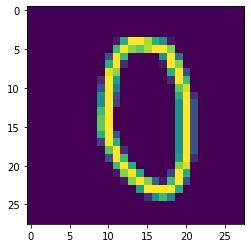

In [7]:
loaded_images = list()
for filename in listdir('/content/drive/MyDrive/Colab Notebooks/mnist own'):
  im = plt.imread('/content/drive/MyDrive/Colab Notebooks/mnist own/'+filename)
  loaded_images.append(im)


x_own = np.array(loaded_images)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
time1_k = time.time()
predictions = probability_model.predict([x_own])
time2_k= time.time()
print((time2_k-time1_k)/10)
print(predictions.shape)
print(np.argmax(predictions[0]))
plt.imshow(x_own[0])

In [ ]:
def rgb2gray():
  for filename in listdir('/content/sample_data/mnist_org'):
      im = cv2.imread('/content/sample_data/mnist_org/'+filename, cv2.IMREAD_GRAYSCALE)
      im_gray =cv2.imwrite('/content/sample_data/mnist_new/'+filename, im)
  
  return im_gray

new_rgb = rgb2gray()


(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


(224, 224, 3)


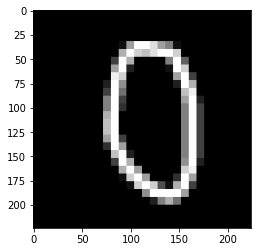

In [8]:
#convertion of image from single layer to RGB
def gray2rgb(image):
  new_im = list()
  for i in range (len(image)):
    rgb = cv2.cvtColor(image[i], cv2.COLOR_GRAY2RGB)
    res_im = cv2.resize(rgb, (224, 224), interpolation = cv2.INTER_AREA)
    
    new_im.append(res_im)

  
  rgb_im = np.array(new_im)
  
  return rgb_im

new_rgb = gray2rgb(x_own)

print(new_rgb[0].shape)
plt.imshow(new_rgb[0])

In [9]:

data = preprocess_input(new_rgb)
base_model = MobileNetV2(
    
        weights='imagenet',
        input_shape = (224, 224, 3))


time1_M = time.time()
predictions = base_model.predict(data)
time2_M=time.time()

print("Inference average speed of MobileNetV2: "+ str((time2_M-time1_M)/10))



14548992/14536120 [==============================] - 0s 0us/step
Inference average speed of MobileNetV2: 0.09537432193756104


In [10]:
model = tf.keras.applications.resnet50.ResNet50(
    
    weights='imagenet', 
    input_shape=(224, 224, 3),
    )
time1_R = time.time()
predictions = model.predict(data)
time2_R = time.time()

print("Inference average speed of ResNet50: "+str((time2_R - time1_R)/10))

102981632/102967424 [==============================] - 1s 0us/step
Inference average speed of ResNet50: 0.22385408878326415
